### Part 1 - Implementation

In [1]:
# Model Parameters
input_size = 2 # no of features
layers = [4,3] # no of neurons in 1st and 2nd layer
output_size = 2

In [2]:
import numpy as np

In [3]:
def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [4]:
a = np.array([[10,20],[20,30]])

a_ = softmax(a)
print(a_)

[[4.53978687e-05 9.99954602e-01]
 [4.53978687e-05 9.99954602e-01]]


### Part 2 - Understanding Forward Propagation
- How to pass one example?
- How to pass multiple examples(Vectorization)?
- Writing the code

In [5]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)

In [6]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

### Generating Data

In [7]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [8]:
X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)

In [9]:
print(X.shape)
print(Y.shape)

(500, 2)
(500,)


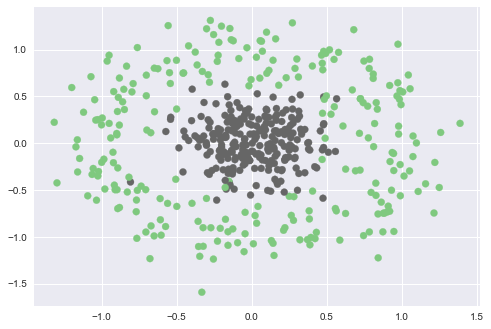

In [10]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

### Training Our Model

In [11]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size = 2)

In [12]:
model.forward(X).shape

(500, 2)

In [13]:
model.summary()

W1  (2, 10)
A1  (500, 10)
W2  (10, 5)
A2  (500, 5)
W3  (5, 2)
Y_  (500, 2)


In [14]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = 2
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [15]:
losses = train(X,Y,model,1000,0.001)

Epoch 0 Loss 0.3571
Epoch 1 Loss 0.3554
Epoch 2 Loss 0.2593
Epoch 3 Loss 0.2407
Epoch 4 Loss 0.2258
Epoch 5 Loss 0.2132
Epoch 6 Loss 0.2020
Epoch 7 Loss 0.1919
Epoch 8 Loss 0.1827
Epoch 9 Loss 0.1742
Epoch 10 Loss 0.1664
Epoch 11 Loss 0.1593
Epoch 12 Loss 0.1527
Epoch 13 Loss 0.1467
Epoch 14 Loss 0.1411
Epoch 15 Loss 0.1360
Epoch 16 Loss 0.1313
Epoch 17 Loss 0.1270
Epoch 18 Loss 0.1230
Epoch 19 Loss 0.1193
Epoch 20 Loss 0.1159
Epoch 21 Loss 0.1127
Epoch 22 Loss 0.1098
Epoch 23 Loss 0.1070
Epoch 24 Loss 0.1045
Epoch 25 Loss 0.1021
Epoch 26 Loss 0.0999
Epoch 27 Loss 0.0978
Epoch 28 Loss 0.0958
Epoch 29 Loss 0.0940
Epoch 30 Loss 0.0922
Epoch 31 Loss 0.0906
Epoch 32 Loss 0.0891
Epoch 33 Loss 0.0876
Epoch 34 Loss 0.0862
Epoch 35 Loss 0.0849
Epoch 36 Loss 0.0837
Epoch 37 Loss 0.0825
Epoch 38 Loss 0.0814
Epoch 39 Loss 0.0803
Epoch 40 Loss 0.0793
Epoch 41 Loss 0.0783
Epoch 42 Loss 0.0774
Epoch 43 Loss 0.0765
Epoch 44 Loss 0.0756
Epoch 45 Loss 0.0748
Epoch 46 Loss 0.0740
Epoch 47 Loss 0.0732
Ep

Epoch 446 Loss 0.0400
Epoch 447 Loss 0.0400
Epoch 448 Loss 0.0399
Epoch 449 Loss 0.0399
Epoch 450 Loss 0.0399
Epoch 451 Loss 0.0399
Epoch 452 Loss 0.0399
Epoch 453 Loss 0.0399
Epoch 454 Loss 0.0399
Epoch 455 Loss 0.0399
Epoch 456 Loss 0.0399
Epoch 457 Loss 0.0398
Epoch 458 Loss 0.0398
Epoch 459 Loss 0.0398
Epoch 460 Loss 0.0398
Epoch 461 Loss 0.0398
Epoch 462 Loss 0.0398
Epoch 463 Loss 0.0398
Epoch 464 Loss 0.0398
Epoch 465 Loss 0.0397
Epoch 466 Loss 0.0397
Epoch 467 Loss 0.0397
Epoch 468 Loss 0.0397
Epoch 469 Loss 0.0397
Epoch 470 Loss 0.0397
Epoch 471 Loss 0.0397
Epoch 472 Loss 0.0397
Epoch 473 Loss 0.0397
Epoch 474 Loss 0.0396
Epoch 475 Loss 0.0396
Epoch 476 Loss 0.0396
Epoch 477 Loss 0.0396
Epoch 478 Loss 0.0396
Epoch 479 Loss 0.0396
Epoch 480 Loss 0.0396
Epoch 481 Loss 0.0396
Epoch 482 Loss 0.0396
Epoch 483 Loss 0.0396
Epoch 484 Loss 0.0395
Epoch 485 Loss 0.0395
Epoch 486 Loss 0.0395
Epoch 487 Loss 0.0395
Epoch 488 Loss 0.0395
Epoch 489 Loss 0.0395
Epoch 490 Loss 0.0395
Epoch 491 

Epoch 988 Loss 0.0362
Epoch 989 Loss 0.0362
Epoch 990 Loss 0.0362
Epoch 991 Loss 0.0362
Epoch 992 Loss 0.0362
Epoch 993 Loss 0.0362
Epoch 994 Loss 0.0362
Epoch 995 Loss 0.0362
Epoch 996 Loss 0.0362
Epoch 997 Loss 0.0362
Epoch 998 Loss 0.0361
Epoch 999 Loss 0.0361


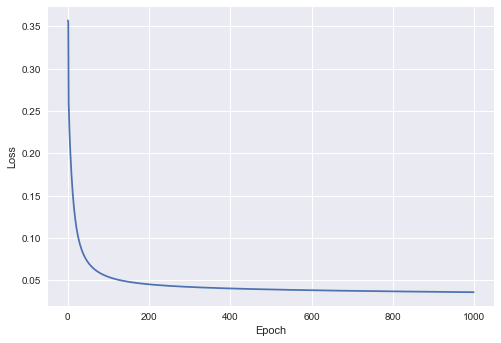

In [16]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [19]:
from visualize import plot_decision_boundary

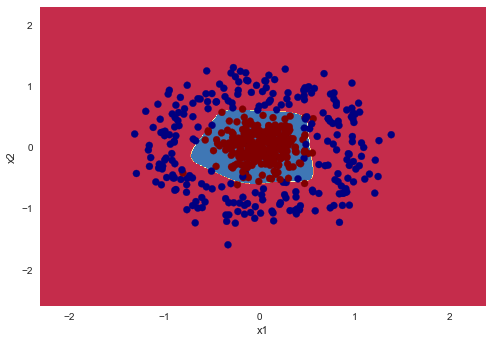

In [20]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [21]:
outputs = model.predict(X)
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Accuracy %.4f"%(training_accuracy*100))

Training Accuracy 97.0000


### Testing on other non-linear datasets

In [22]:
model  = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

## XOR dataset

In [23]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]
             ])

Y = np.array([0,1,1,0])

In [33]:
losses = train(X,Y,model,500,0.1)

Epoch 0 Loss 0.0005
Epoch 1 Loss 0.0005
Epoch 2 Loss 0.0005
Epoch 3 Loss 0.0005
Epoch 4 Loss 0.0005
Epoch 5 Loss 0.0005
Epoch 6 Loss 0.0005
Epoch 7 Loss 0.0005
Epoch 8 Loss 0.0005
Epoch 9 Loss 0.0005
Epoch 10 Loss 0.0005
Epoch 11 Loss 0.0005
Epoch 12 Loss 0.0005
Epoch 13 Loss 0.0005
Epoch 14 Loss 0.0005
Epoch 15 Loss 0.0005
Epoch 16 Loss 0.0005
Epoch 17 Loss 0.0005
Epoch 18 Loss 0.0005
Epoch 19 Loss 0.0005
Epoch 20 Loss 0.0005
Epoch 21 Loss 0.0005
Epoch 22 Loss 0.0005
Epoch 23 Loss 0.0005
Epoch 24 Loss 0.0005
Epoch 25 Loss 0.0005
Epoch 26 Loss 0.0005
Epoch 27 Loss 0.0005
Epoch 28 Loss 0.0005
Epoch 29 Loss 0.0005
Epoch 30 Loss 0.0005
Epoch 31 Loss 0.0005
Epoch 32 Loss 0.0005
Epoch 33 Loss 0.0005
Epoch 34 Loss 0.0005
Epoch 35 Loss 0.0005
Epoch 36 Loss 0.0005
Epoch 37 Loss 0.0005
Epoch 38 Loss 0.0005
Epoch 39 Loss 0.0005
Epoch 40 Loss 0.0005
Epoch 41 Loss 0.0005
Epoch 42 Loss 0.0005
Epoch 43 Loss 0.0005
Epoch 44 Loss 0.0005
Epoch 45 Loss 0.0005
Epoch 46 Loss 0.0005
Epoch 47 Loss 0.0005
Ep

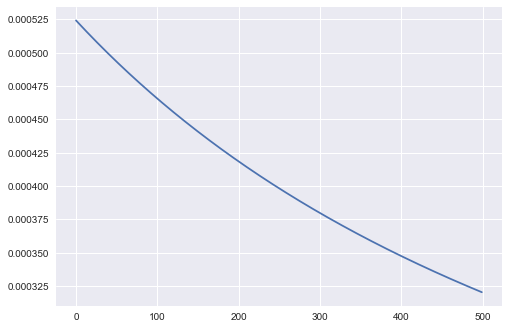

In [35]:
plt.plot(losses)
plt.show()

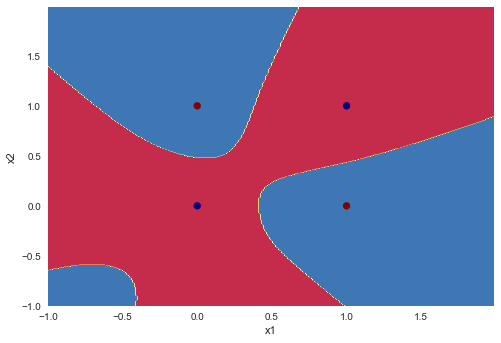

In [36]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

## Other datasets

In [37]:
from sklearn.datasets import make_moons,make_circles,make_classification

In [38]:
def load_dataset(dataset):
    if dataset=='moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1) #Perceptron
    elif dataset=='circles':
        X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
    elif dataset=='classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else:
        #Create XOR Dataset
        X = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])
        Y = np.array([0,1,1,0])
        
    return X,Y

Training Acc 1.0000


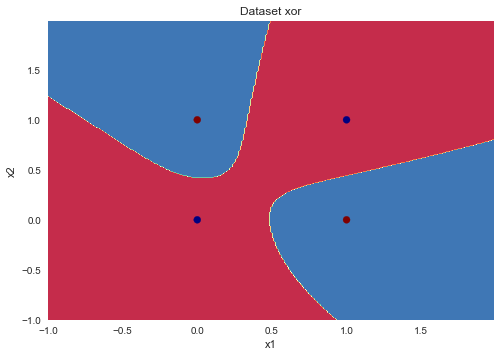

Training Acc 0.9600


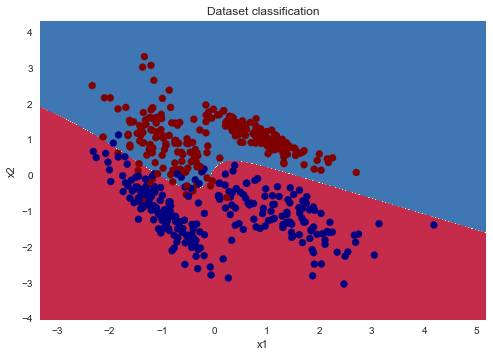

Training Acc 0.9740


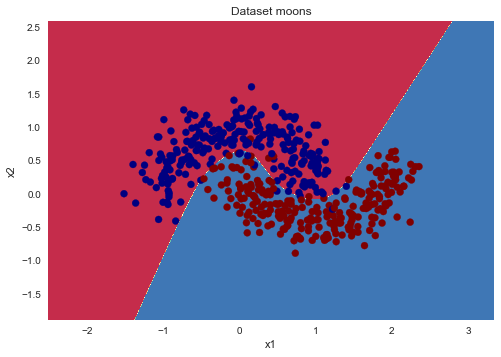

Training Acc 0.9640


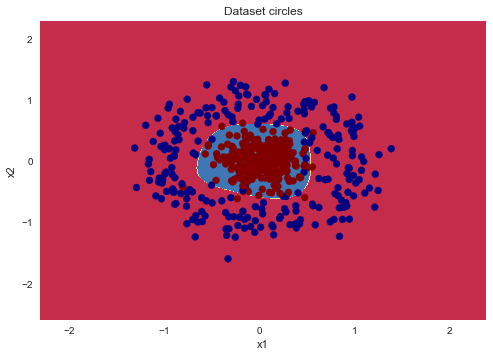

In [39]:
datasets = ["xor","classification","moons","circles"]

for d in datasets:
    model = NeuralNetwork(input_size=2,layers=[4,3],output_size=2)
    X,Y  = load_dataset(d)
    train(X,Y,model,1000,0.001,logs=False)
    outputs = model.predict(X)
    
    training_accuracy = np.sum(outputs==Y)/Y.shape[0]
    print("Training Acc %.4f"%training_accuracy)
    
    plt.title("Dataset "+d)
    plot_decision_boundary(lambda x:model.predict(x),X,Y)
    plt.show()